# Техника сглаживания для тензорных норм

Техника сглаживания оказала достаточно большое влияние на развитие методов восстановления тензоров (matrix completion problem является частным случаем). 

Рассмотрим задачу восстановления матрицы $Y$. Мы наблюдаем только небольшой набор элементов матрицы $Y$, множество индексов известных элементов обозначим через $E$. То есть мы знаем $Y_{ij}$ для всех $(i,j) \in E$, и не знаем $Y_{ij}$ для всех $(i,j) \notin E$.

Понятно, что без наличия какой-либо дополнительной информации о матрице $Y$ эта постановка является тривиальной: любая матрица $X$, для которой выполнено $X_{i,j} = Y_{i,j}, \quad (i,j) \in E$ является разумным ответом. Таких матриц бесконечно много. Соответственно задача восстановления матриц обычно рассматривается как частный случай задачи приближения матрицы, а критерий качества (целевая функция) говорит не столько о близости $X$ к $Y$, сколько о полезных свойствах матрицы $X$ (этим свойствам матрица $Y$ может и не обладать).

Одна из самых популярных постановок, с которой Вы наверняка сталкивались, например, строя рекомендательные системы, является задача о поиске наилучшего приближения заданной матрицы матрицей малого ранга:

$$
\begin{align*}
& \min_{X} rk(X) \\
& X_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$
Как известно, в общем случае эта задача является NP-трудной.

Для того, чтобы обойти это припятствие ранк матрицы аппроксимируется той или иной выпуклой функцией от матрицы $X$.

Опять же стандартным выбором является переход к постановке задачи с использованием 1-й нормы Шаттена (она же trace norm).

$\textbf{RegMC problem}$

$$
\begin{align*}
& \min_{X}\|X \|_* \\
& X_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$

Здесь $X_* = \sum \sigma_i(X)$. 


1. (5 pts) Найдите аналитическую запись для градиента сглаженной версии целевого функционала $\|X\|_*$ используя в качестве прокс-функции $d(Z) = \frac{1}{2}\|Z\|_F^2$.
2. (5 pts) Реализуйте быстрый градиентный спуск (лекция про сглаживание или статья Smooth minimization of non-smooth functions [Nesterov, 2005]) для  сглаженной версии задачи RegMC problem. В качестве прокс-функции для прямой задачи используйте $d(Z) = \frac{1}{2}\|Z\|_F^2$.
3. (5 pts) Реализуйте какую-либо версию метода проксимального градиентного спуска для решения RegMC problem. 
4. (5 pts) Протестируйте алгоритмы из п.2-3 на тестовых данных. Для построния тестовых данных возьмите произвольный датасет картинок. Для каждой картинки удалите случайный набор пикселей (от 10% до 90%). 
От Вас требуется сравнить скорость сходимости методов на тестовых данных. Предложите метод сравнения и обоснуйте свой выбор.





1. $f(x) = \sup\limits_{||Y||_2 \leq 1} tr(X^TY) \\ $
Прокс функция: 
$d(Y) = \frac{1}{2}||Y||^2_F \\ $
Сглаженная функция имеет вид: 
$ f_{\mu}(X) = \sup\limits_{||Y||_2 \leq 1} (<X, Y>_F - \mu d(Y)) = \max\limits_{||Y||_2 \leq 1} (<X, Y>_F - \frac{\mu}{2} ||Y||_F^2) =  \sup\limits_{||Y||_2 \leq 1} (<X, Y>_F - \frac{\mu}{2} ||Y||_F^2 - \frac{1}{\mu} ||X||_F^2 + \frac{1}{\mu} ||X||_F^2) = \sup\limits_{||Y||_2 \leq 1} (- ||\frac{1}{\sqrt\mu} X - \sqrt\frac{\mu}{2}Y||_F^2 + \frac{1}{\mu} ||X||_F^2) = -\frac{\mu}{2} \inf\limits_{||Y||_2 \leq 1} (||\frac{1}{\mu} X - Y||_F^2) + \frac{1}{\mu} ||X||_F^2 \\ $

Так как мы минимизируем только по У, то задача сводится к нахождению $\inf\limits_{||Y||_2 \leq 1} (||\frac{1}{\mu} X - Y||_F^2)$. А это задача минимизации матрицей наименьшего ранга. Для минимизации аппроксимирующей матрицы необходимо выбрать сингулярные числа следующим образом: 

$h(\sigma_i) = min\{\frac{1}{\mu} \sigma_i(X), 1\}$

Тогда градиент сглаженного функционала

$ \nabla f_{\mu}(X) = arg\max\limits_{||Y||_2 \leq 1} (<X, Y>_F - \frac{\mu}{2}||Y||_F^2) \\ $

будет иметь вид:

$\nabla f_{\mu}(X) = \sum\limits_{i} h(\sigma_i) v_i u_i^T = \sum\limits_{i} min\{\frac{1}{\mu} \sigma_i(X), 1\} v_i u_i^T$


2. $[\textit{Zhang Liu and Lieven Vandenberghe}$ // Interior-point method for nuclear norm approximation with application to system identification]:

Возьмем SVD разложение X:

$X = \sum_{i=1}^r \sigma_i u_i v_i^T$
и заменим сингулярные значения на функцию:

\begin{equation*}
h_{\mu}(\sigma_i) =  
 \begin{cases}
   \frac{\sigma_i^2}{2 \mu}, \sigma_i \leq \mu \\
   \sigma_i - \frac{\mu}{2}, \sigma_i > \mu
 \end{cases}
\end{equation*}

$f_{\mu}(X) = \sum_{i=1}^r h_{\mu}(\sigma_i) u_i v_i^T$

$[\textit{Yu. Nesterov}$ // Smooth minimization of non-smooth functions]:


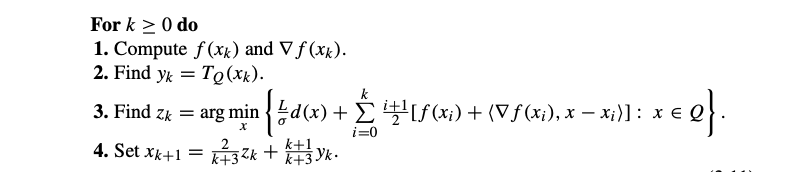

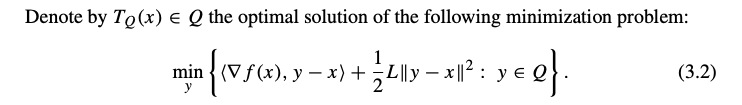

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#Загружаем изображения и помещаем их в список
original_images = []
for i in range(1, 6):
    img = Image.open('/Users/alisakugusheva/' + str(i) + '.jpeg')
    imag = img.convert(mode='L')
    img = np.asarray(img, dtype=np.float64)
    img = img[:,:,1] / 255      #Я использую одноканальные изображения поскольку результат на них более показательный
    original_images.append(img)

In [2]:
#Функция, зануляющая часть пикселей изображения:
def change_img(img, p):
    mask = np.random.choice((0, 1), size = img.shape[0] * img.shape[1], p=(p, 1-p)).reshape(img.shape[0], img.shape[1])
    img_2 = mask * img
    return img_2, mask==1

#Исходный функционал:
def f(X, mu):
    u, sigma, v = np.linalg.svd(X)
    def h(sigma, mu):
        if sigma <= mu:
            return sigma ** 2 / (2 * mu)
        else:
            return sigma - mu / 2
    f_mu = 0
    for i in range(sigma.shape[0]):
        f_mu = f_mu + h(sigma[i], mu) 
    return f_mu

#Градиент функционала:
def fast_grad(X, mu):
    u, sigma, v = np.linalg.svd(X)
    def h(sigma, mu):
        if sigma <= mu:
            return sigma / mu 
        else:
            return 1
    grad = np.zeros(X.shape)
    for i in range(sigma.shape[0]):
        grad = grad + h(sigma[i], mu) * np.outer(u[:,i], v.T[:,i])
    return grad

In [3]:
restored_images = []
broken_images = []
res = {'image':[], 'func':[]}
func = []

#Запускаем цикл по всем изображениям
for img in range (len(original_images)):    
    brkn_img, mask = change_img(original_images[img], 0.5)  #"портим" картинки с занулением 50% пикселей
    broken_images.append(brkn_img)
    
    mu = 1 #изменяемый параметр
    rstr_img = brkn_img
    ag = np.zeros(rstr_img.shape)
    n = 15 #количество итераций
    res['image'].append(img)
    
    #Реализация метода быстрого градиентного спуска:
    for i in range(n):
        grad = fast_grad(rstr_img, mu)
        ag = ag + (i + 1) / 2 * grad
        y = rstr_img - 1 / mu * grad
        z = - mu * ag
        rstr_img = 2 / (i + 3) * z + (i + 1) / (i + 3) * y
        rstr_img[mask] = brkn_img[mask]
        func.append(f(rstr_img, mu))
    res['func'].append(func)
    func = []
    restored_images.append(rstr_img)

Результат для параметра $\mu = 1$, 15 итераций цикла быстрого градиентного спуска и зануления 50% пикселей.

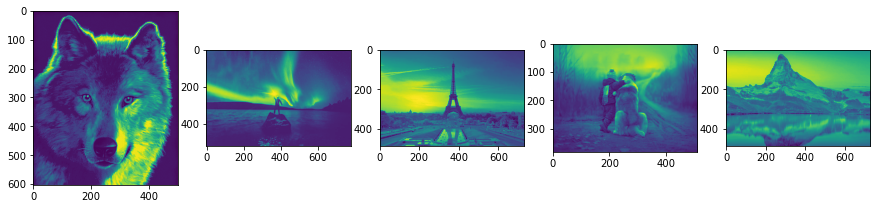

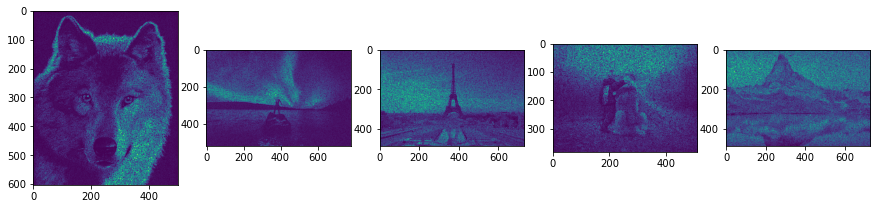

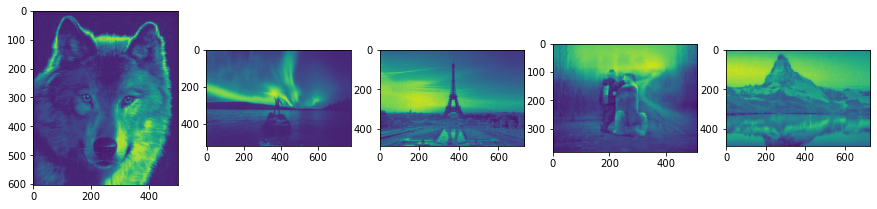

In [11]:
#Исходные картинки
fig, axs = plt.subplots(1, 5, figsize=(15, 15))
for i in range(0,5):
    axs[i].imshow(original_images[i])
plt.show()

#Испорченные картинки
fig, axs = plt.subplots(1, 5, figsize=(15, 15))
for i in range(0,5):
    axs[i].imshow(broken_images[i])
plt.show()

#Восстановленные картинки
fig, axs = plt.subplots(1, 5, figsize=(15, 15))
for i in range(0,5):
    axs[i].imshow(restored_images[i])
plt.show()

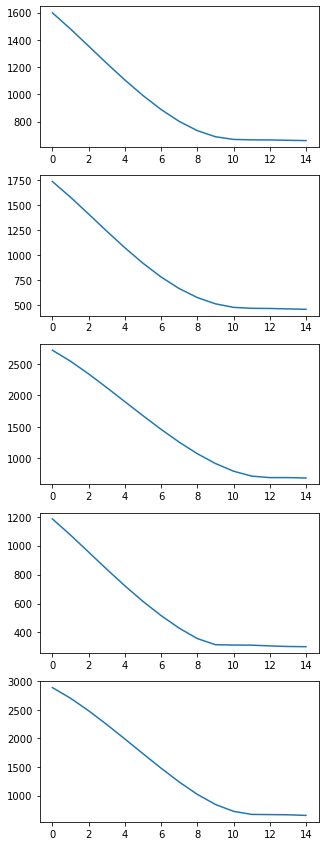

In [12]:
#Критерий остановки алгоритма - выход функции на плато (результаты для каждой из картинок):
fig, axs = plt.subplots(5, 1, figsize=(5, 15))
for i in range(len(res['image'])):
    axs[i].plot(res['func'][i])
plt.show()

In [13]:
def change_image(img, p):
    Y = img.copy().reshape(-1)
    mask = np.random.choice(list(range(Y.shape[0])), 
                           int((1 - p) * Y.shape[0]), 
                           replace=False)
    zero_idx = np.array(list(set(list(range(Y.shape[0]))) - set(mask)))
    return mask, Y[mask], zero_idx

def P(X, idx, Y):
    shape = X.shape
    X = X.copy().reshape(-1)
    X[idx] = Y
    X = X.reshape(shape)
    return X

In [14]:
def pg_step(X, mu):
    step = 0
    u, sigma, v = np.linalg.svd(X)
    res = np.zeros(X.shape)
    for i in range(sigma.shape[0]):
        sigma_mu = max(sigma[i] - mu, 0)
        step += sigma_mu
    return step

def prox_grad(X, mu):
    grad = 0
    u, sigma, v = np.linalg.svd(X)
    res = np.zeros(X.shape)
    for i in range(sigma.shape[0]):
        sigma_mu = max(sigma[i] - mu, 0)
        grad += sigma_mu * np.outer(u[:,i], v.T[:,i])
    return grad

restored_images = []
broken_images = []
res = {'image':[], 'criterion':[]}
criterion = []

#Запускаем цикл по всем изображениям
for img in range (len(original_images)):  
    mask, Y, zero_idx = change_image(original_images[img], 0.5)
   
    mu = 1
    n = 20
    t = 1
    criterion = []
    X = np.zeros(original_images[img].shape)
    
    for i in range(n):
        X = prox_grad(X + t*(P(original_images[img], zero_idx, 0) - P(X, zero_idx, 0)), mu)
        criterion.append(pg_step(X, mu))
    res['criterion'].append(criterion)
    criterion = []
    restored_images.append(X)

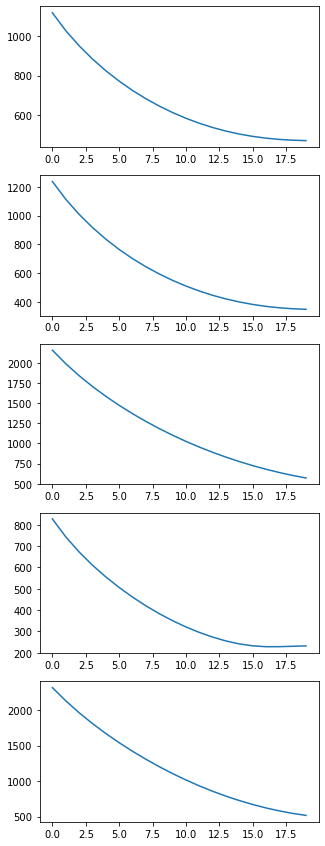

In [15]:
fig, axs = plt.subplots(5, 1, figsize=(5, 15))
for i in range(5):
    axs[i].plot(res['criterion'][i])
plt.show()

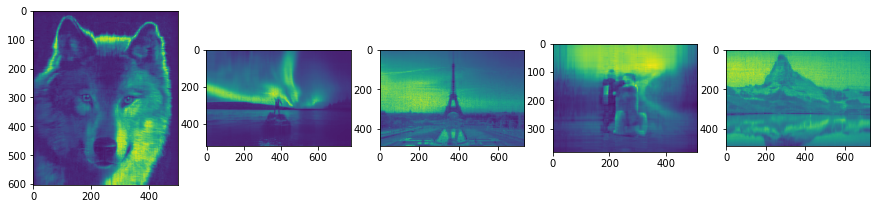

In [16]:
fig, axs = plt.subplots(1, 5, figsize=(15, 15))
for i in range(0,5):
    axs[i].imshow(restored_images[i])
plt.show()